 # <span style="color:#9467bd"><b>📊 BUSINESS DATA CASE </b></span>


In [ ]:
######## PACKAGE INSTALATION  #######
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## <span style="color:#1f77b4"><b>STEP 1: Customers’ insights discovery</b></span>


### Retailer Dataset: Data Cleaning and Descriptive Statistics


In [68]:
df_retailer = pd.read_csv('data/retailer.csv')
df_retailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9866049 entries, 0 to 9866048
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   customer_id    object 
 1   timestamp_utc  object 
 2   event_name     object 
 3   brand          object 
 4   product_name   object 
 5   sales          float64
 6   quantity       float64
dtypes: float64(2), object(5)
memory usage: 526.9+ MB


The dataset contains **7 variables** and **9,866,049 rows (events)**.  
The variable `timestamp_utc` is stored as an object (string).  
Therefore, it needs to be converted into a proper **date/datetime variable** to enable time-based analysis.


In [69]:
df_retailer.head(10)

,customer_id,timestamp_utc,event_name,brand,product_name,sales,quantity
0,reFs5GI87lXJkJSi9r,2024-02-07 02:27:10,Product Page View,NaN,NaN,NaN,NaN
1,reFs5GI87lXJkJSi9r,2024-06-12 16:16:54,Product Page View,Science Diet,SD Fel A7+ SavCknEnt 24x5.5oz cs,NaN,NaN
2,reTjziox2cSrxVq70Y,2024-02-28 04:11:46,Product Page View,NaN,NaN,NaN,NaN
3,reTjziox2cSrxVq70Y,2024-02-28 04:30:42,Product Page View,Science Diet,SD Fel Adt HBC OFEnt 24x5.5oz cs,NaN,NaN
4,reOrpt9vhSwhbPVtni,2024-06-01 22:22:30,Product Page View,NaN,NaN,NaN,NaN
5,reOrpt9vhSwhbPVtni,2024-06-01 22:36:26,Product Page View,Science Diet,SD Ca Adt Lt Ckn 30lb bg,NaN,NaN
6,reOrpt9vhSwhbPVtni,2024-06-01 22:43:07,Product Page View,Science Diet,SD Ca Adt Lt SB Ckn 5lb bg,NaN,NaN
7,reOrpt9vhSwhbPVtni,2024-06-20 14:02:48,Product Page View,Science Diet,SD Ca Adt Lt SB Ckn 5lb bg,NaN,NaN
8,reOrpt9vhSwhbPVtni,2024-06-06 10:38:51,Order,Science Diet,SD Ca Adt Lt SB Ckn 5lb bg,19.99,1.0
9,reOrpt9vhSwhbPVtni,2024-06-01 22:47:09,Add to cart,Science Diet,SD Ca Adt Lt SB Ckn 5lb bg,NaN,NaN


In [70]:
col1 = ['event_name', 'brand']

for c in col1:
    print(f"\n=== {c} ===")
    print(df_retailer[c].unique())


=== event_name ===
['Product Page View' 'Order' 'Add to cart']

=== brand ===
[nan 'Science Diet' 'Hills' 'Prescription Diet']


#### Should we keep rows where `brand` and `product_name` are NaN?


In [71]:
df_to_check = df_retailer[
    df_retailer[['brand', 'product_name']].isna().all(axis=1)
]
df_to_check.shape

(277240, 7)

There are **277,240 rows** where both `brand` and `product_name` are missing.  
To decide whether these rows should be kept or removed, we check **whether any purchases occurred in these rows**.

If no purchase events (`Order`) are associated with these observations, they do not contribute to revenue or conversion analysis and can be safely removed.  
Otherwise, they would require further investigation.

In [56]:
df_sales_notna = df_to_check[df_retailer['sales'].notna()]
df_sales_notna.shape

C:\Users\nouts\AppData\Local\Temp\ipykernel_208\539845987.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sales_notna = df_to_check[df_retailer['sales'].notna()]


(8776, 7)

In [57]:
df_sales_notna.head()

,customer_id,timestamp_utc,event_name,brand,product_name,sales,quantity
863,reczbO5sThS4rw0JdJ,2024-01-05 21:38:18,Order,NaN,NaN,78.99,1.0
885,reSFq86EE91VCfBImt,2024-03-15 03:35:17,Order,NaN,NaN,101.55,1.0
1575,reOseksZcmsUreRQbs,2024-03-15 02:40:17,Order,NaN,NaN,101.55,1.0
3608,re3Brfqpz42LjIx8Vc,2024-05-11 20:33:39,Order,NaN,NaN,96.99,1.0
5404,reLJUcuTVC8k9FQsNK,2024-04-14 03:19:34,Order,NaN,NaN,37.85,1.0


Among these rows, **more than 8,000 observations correspond to purchase events (`Order`)**.  
This indicates that some transactions occurred even when `brand` and `product_name` were missing.

In [72]:
# Filter for rows with NaN in brand, product_name, sales, AND event_name
df_check_all_nan = df_retailer[
    (df_retailer[['brand', 'product_name', 'sales']].isna().all(axis=1)) &
    (df_retailer['event_name'].isna())
]

df_check_all_nan.shape

(0, 7)

In the end, although no information is available on `brand` and `product_name`, we know that the individuals concerned **at least visited a product page**, and that **some of these observations correspond to actual purchases**.

Therefore, these rows still carry relevant behavioral and transactional information.  
For now, they are **kept in the dataset**, and this issue will be **revisited later** if more detailed product-level analysis is required.


In [62]:
#df_retailer = df_retailer.dropna(subset=['brand', 'product_name'], how='all')
#df_retailer.shape

In [75]:
# Convert the timestamp column to datetime format and extract the date component
df_retailer['timestamp_utc'] = pd.to_datetime(df_retailer['timestamp_utc'])
df_retailer['date'] = df_retailer['timestamp_utc'].dt.date

In [76]:
# Key descriptive statistics
infos = {
    "n_events": len(df_retailer),
    "n_customers": df_retailer["customer_id"].nunique(),
    "n_products": df_retailer["product_name"].nunique(),
    "n_brands": df_retailer["brand"].value_counts().to_dict(),
    "event_distribution": df_retailer["event_name"].value_counts().to_dict()
}

infos

{'n_events': 9866049,
 'n_customers': 1354584,
 'n_products': 505,
 'n_brands': {'Science Diet': 7858536,
  'Prescription Diet': 1247520,
  'Hills': 482753},
 'event_distribution': {'Product Page View': 6376627,
  'Add to cart': 2050111,
  'Order': 1439311}}

In [82]:
import plotly.express as px

# Prepare data from infos
event_dist = {
    "event": list(infos["event_distribution"].keys()),
    "freq": list(infos["event_distribution"].values())
}

# Donut chart
fig = px.pie(
    event_dist,
    names="event",
    values="freq",
    hole=0.70,
    color_discrete_sequence=["#A74E4E", "#A22BF2", "#A1934F"]
)

# Center text
center_text = (
    f"<b>{sum(event_dist['freq'])}</b><br>"
    "events"
)

fig.update_traces(textinfo="percent+label")

fig.update_layout(
    annotations=[dict(
        text=center_text,
        x=0.5,
        y=0.5,
        showarrow=False,
        font_size=14
    )],
    legend=dict(
        orientation="h",
        x=0.0,
        y=1.25
    ),
    title="Event Distribution",
    margin=dict(t=80, b=40, l=40, r=40)
)

fig.show()


In [ ]:
# Compute brand distribution (including NaN if needed)
brand_dist = (
    df_retailer["brand"]
    .fillna("Missing")
    .value_counts(normalize=True)
    .reset_index()
)

brand_dist.columns = ["brand", "freq"]
brand_dist["freq_label"] = (brand_dist["freq"] * 100).round(1).astype(str) + "%"

# Center annotation
center_text = (
    f"<b>{df_retailer.shape[0]}</b><br>"
    "events<br>"
)

# Donut chart
fig = px.pie(
    brand_dist,
    names="brand",
    values="freq",
    hole=0.68,
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_traces(textinfo="percent+label")

fig.update_layout(
    annotations=[dict(
        text=center_text,
        x=0.5,
        y=0.5,
        showarrow=False,
        font_size=13
    )],
    legend=dict(
        orientation="h",
        x=0.0,
        y=1.25
    ),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    margin=dict(t=80, b=40, l=40, r=40),
    title="Brand Distribution"
)

fig.show()
#


In [84]:
import plotly.express as px

# Loop over each brand
for brand, df_b in df_retailer.groupby("brand"):
    
    # Compute event distribution for the brand
    event_dist = (
        df_b["event_name"]
        .value_counts()
        .reset_index()
    )
    event_dist.columns = ["event", "freq"]

    # Center text
    center_text = (
        f"<b>{brand}</b><br>"
        "event distribution"
    )

    # Donut chart
    fig = px.pie(
        event_dist,
        names="event",
        values="freq",
        hole=0.70,
        color_discrete_sequence=["#A74E4E", "#A22BF2", "#A1934F"]
    )

    fig.update_traces(textinfo="percent+label")

    fig.update_layout(
        annotations=[dict(
            text=center_text,
            x=0.5,
            y=0.5,
            showarrow=False,
            font_size=14
        )],
        legend=dict(
            orientation="h",
            x=0.0,
            y=1.25
        ),
        title=f"Event Distribution – {brand}",
        margin=dict(t=80, b=40, l=40, r=40)
    )

    fig.show()


In [29]:
df_freq_clients = df_retailer['customer_id'].value_counts().reset_index()
df_freq_clients.columns = ['customer_id', 'frequency']
df_freq_clients

,customer_id,frequency
0,unknown,189317
1,reth7mdoDJCbkDalaK,6190
2,reJZhNiD0cXQyewGn3,5658
3,reHQRAI2c9b35Tij3O,2070
4,rejr2YF7XyHh2RavMT,1956
...,...,...
1330500,regUDBUsqwqVQiyJy9,1
1330501,reNzHg4c4Q48qTyMJo,1
1330502,reStlfSPxkGOxfo7dj,1
1330503,re84o8z12IdZUEk8Qb,1


In [30]:
# Calculate total quantity sold by brand
quantity_by_product = df_retailer.groupby('brand')['quantity'].sum().sort_values(ascending=False)
quantity_by_product

brand
Science Diet         1264559.0
Hills                 151019.0
Prescription Diet     131021.0
Name: quantity, dtype: float64

In [31]:
df_retailer[df_retailer['sales'].notna()].head(5)

,customer_id,timestamp_utc,event_name,brand,product_name,sales,quantity,date
8,reOrpt9vhSwhbPVtni,2024-06-06 10:38:51,Order,Science Diet,SD Ca Adt Lt SB Ckn 5lb bg,19.99,1.0,2024-06-06
18,reutQ3jiBX9Li4Ggqi,2024-06-07 11:48:47,Order,Science Diet,SD Ca Adt Lt Ckn 15lb bg,46.99,1.0,2024-06-07
207,unknown,2024-04-13 00:50:50,Order,Science Diet,SD Ca Adt Lt SB Ckn 5lb bg,39.98,2.0,2024-04-13
344,reDzpCoOpWJc5l9K3y,2024-03-02 19:42:22,Order,Science Diet,SD Ca Adt Lt SB Ckn 5lb bg,19.99,1.0,2024-03-02
345,reDzpCoOpWJc5l9K3y,2024-04-18 12:27:36,Order,Science Diet,SD Ca Adt Lt SB Ckn 5lb bg,19.99,1.0,2024-04-18


C:\Users\nouts\AppData\Local\Temp\ipykernel_208\3507731850.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


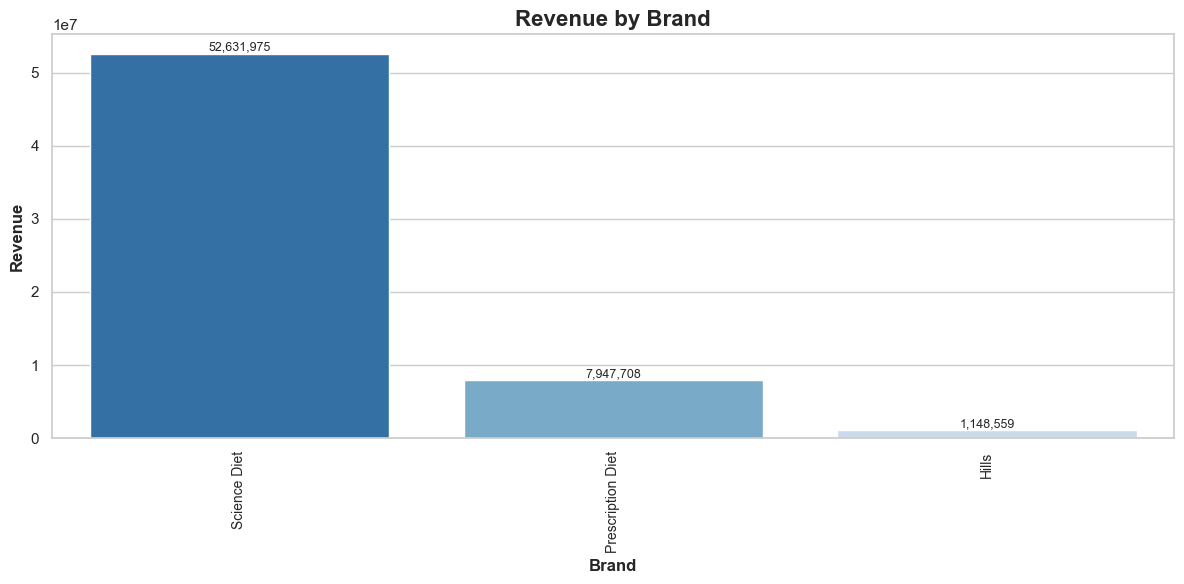

In [32]:
# Set professional style
sns.set_theme(style="whitegrid")

# Compute revenue by brand and sort
revenue_by_brand = (
    df_retailer.groupby('brand')['sales']
    .sum()
    .reset_index()
    .sort_values('sales', ascending=False)
)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=revenue_by_brand,
    x='brand',
    y='sales',
    palette='Blues_r'  # nice gradient blue
)

plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Brand", fontsize=12, weight='bold')
plt.ylabel("Revenue", fontsize=12, weight='bold')
plt.title("Revenue by Brand", fontsize=16, weight='bold')

# Add values on top of bars (optional)
for i, v in enumerate(revenue_by_brand['sales']):
    plt.text(i, v, f"{v:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


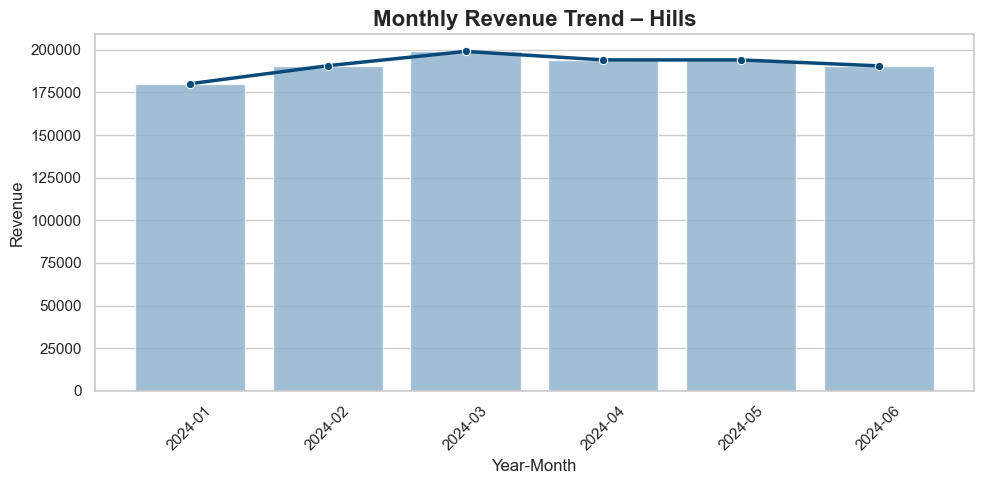

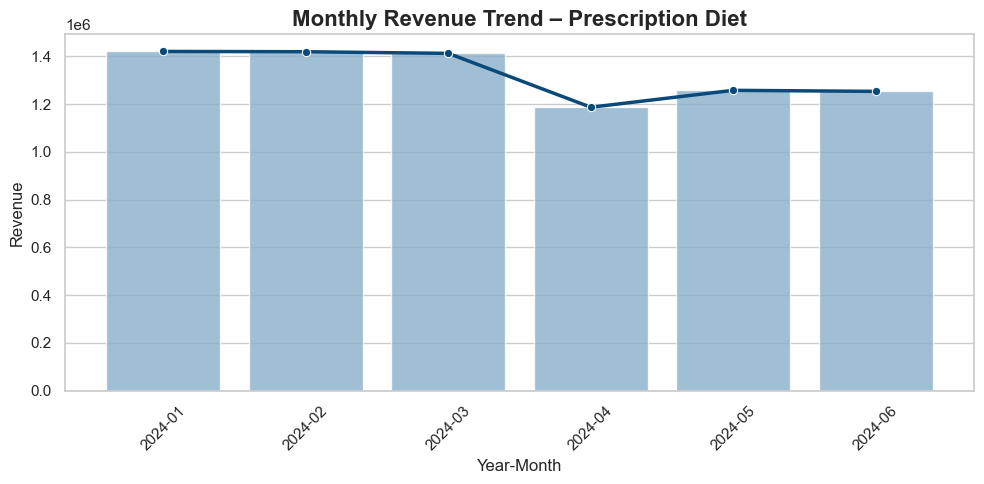

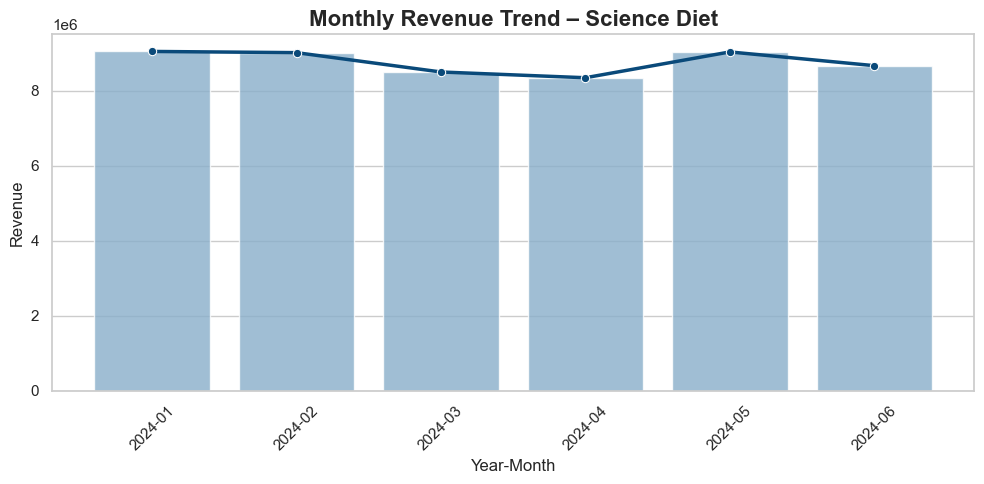

In [33]:
# --- STYLE ---
sns.set_theme(style="whitegrid")   # clean modern style

# Ensure date column is datetime
df_retailer['date'] = pd.to_datetime(df_retailer['date'], errors='coerce')

# Keep only valid sales
df_sales = df_retailer[df_retailer['sales'].notna()].copy()

# Create year-month column
df_sales['year_month'] = df_sales['date'].dt.to_period('M').astype(str)

# Monthly revenue per brand
monthly_revenue = (
    df_sales.groupby(['year_month', 'brand'])['sales']
    .sum()
    .reset_index()
)

# List of unique brands
brands = monthly_revenue['brand'].unique()

# ----- BEAUTIFUL CHART FOR EACH BRAND -----
for b in brands:
    brand_data = monthly_revenue[monthly_revenue['brand'] == b]

    plt.figure(figsize=(10,5))

    # BARPLOT
    sns.barplot(
        data=brand_data,
        x='year_month',
        y='sales',
        color="#7EB0D5",
        alpha=0.8
    )

    # LINE on top
    sns.lineplot(
        data=brand_data,
        x='year_month',
        y='sales',
        color="#0A4A7A",
        marker='o',
        linewidth=2.5
    )

    plt.xticks(rotation=45)
    plt.xlabel("Year-Month", fontsize=12)
    plt.ylabel("Revenue", fontsize=12)
    plt.title(f"Monthly Revenue Trend – {b}", fontsize=16, weight="bold")

    plt.tight_layout()
    plt.show()


In [34]:
# Pivot table by brand instead of product_name
brand_stats = df_retailer.pivot_table(
    index='brand',
    columns='event_name',
    values='customer_id',
    aggfunc='count'
)

# Replace NaN with zeros
brand_stats = brand_stats.fillna(0)

# Funnel metrics
brand_stats['cart_rate'] = brand_stats['Add to cart'] / brand_stats['Product Page View']
brand_stats['order_rate'] = brand_stats['Order'] / brand_stats['Product Page View']
brand_stats['conversion_cart_to_order'] = brand_stats['Order'] / brand_stats['Add to cart']

# Top 20 brands by order rate
brand_stats.sort_values('order_rate', ascending=False)


event_name,Add to cart,Order,Product Page View,cart_rate,order_rate,conversion_cart_to_order
brand,,,,,,
Hills,137429,112298,233026,0.589758,0.481912,0.817135
Science Diet,1652119,1201422,5004995,0.330094,0.240045,0.727201
Prescription Diet,236211,116815,894494,0.264072,0.130593,0.494537


In [40]:
# Calculate total revenue for 6 months
total_revenue_6m = df_sales['sales'].sum()

# Calculate revenue from top 20% clients (by monetary value)
top_20_pct_clients = df_rfm.nlargest(int(len(df_rfm) * 0.2), 'monetary')
revenue_top_20_pct = top_20_pct_clients['monetary'].sum()

# Calculate percentage
pct_revenue_from_top_20 = (revenue_top_20_pct / total_revenue_6m) * 100

print(f"Total Revenue (6 months): ${total_revenue_6m:,.2f}")
print(f"Revenue from top 20% clients: ${revenue_top_20_pct:,.2f}")
print(f"Percentage of total revenue: {pct_revenue_from_top_20:.2f}%")

Total Revenue (6 months): $61,728,243.03
Revenue from top 20% clients: $34,208,342.07
Percentage of total revenue: 55.42%


Les top 20% des clients(en terme de dépenses) ont généré 55% du chiffre d'affaire du site 